In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/4009.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15823.jpg
/kaggle/input/intel-image-classification/seg_tr

In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import IPython.display

from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

2.12.0


In [3]:
dir_path='../input/intel-image-classification/'

nsample = pd.DataFrame()
data_stats = pd.DataFrame()
paths=dict()


for dataset in ['train','test']:
    path = os.path.join(dir_path,'seg_'+dataset)
    path = os.path.join(path,'seg_'+dataset)
    paths[dataset]=path
    labels = os.listdir(path)
    

    
    nsample_class = pd.Series({label: len(os.listdir(os.path.join(path,label))) for label in labels},
                              name=dataset)
    data_stats = data_stats.append(nsample_class)


data_stats["Total"] = data_stats.sum(axis=1)

data_stats

/tmp/ipykernel_28/3513572488.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_stats = data_stats.append(nsample_class)
/tmp/ipykernel_28/3513572488.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_stats = data_stats.append(nsample_class)


,mountain,street,buildings,sea,forest,glacier,Total
train,2512,2382,2191,2274,2271,2404,14034
test,525,501,437,510,474,553,3000


In [5]:
paths

{'train': '../input/intel-image-classification/seg_train/seg_train',
 'test': '../input/intel-image-classification/seg_test/seg_test'}

## EDA, how is the distribution of labels across the dataset

In [7]:
data_stats.iloc[0,:-1]

mountain     2512
street       2382
buildings    2191
sea          2274
forest       2271
glacier      2404
Name: train, dtype: int64

In [8]:
data_stats.loc[['train']].drop('Total', axis=1)

,mountain,street,buildings,sea,forest,glacier
train,2512,2382,2191,2274,2271,2404


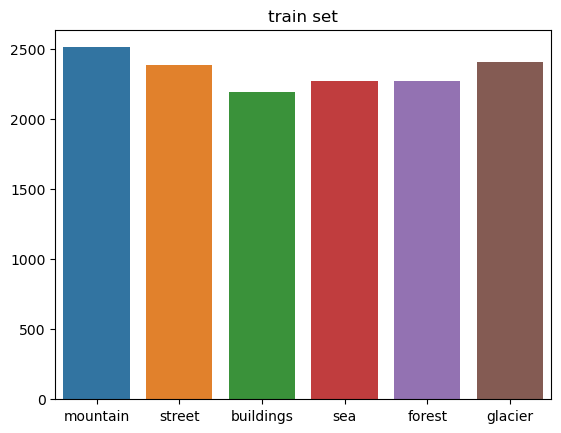

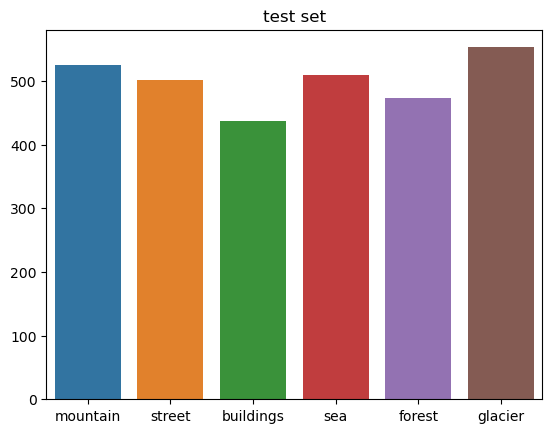

In [9]:
for dataset in ['train', 'test']:
    sns.barplot(data=data_stats.loc[[dataset]].drop('Total', axis=1)).set_title(f'{dataset} set');
    plt.show()

In [10]:
data_stats.columns, data_stats.index

(Index(['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier', 'Total'], dtype='object'),
 Index(['train', 'test'], dtype='object'))

In [11]:
data_stats.drop('Total', axis=1).loc['train']

mountain     2512
street       2382
buildings    2191
sea          2274
forest       2271
glacier      2404
Name: train, dtype: int64

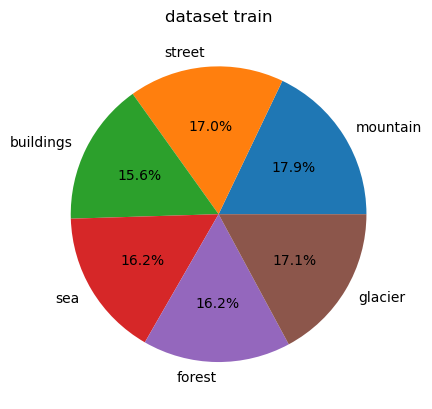

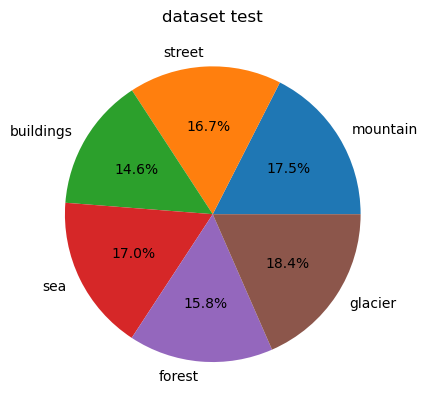

In [12]:
for dataset in ['train', 'test']:
    plt.pie(data_stats.drop('Total', axis=1).loc[dataset], labels=data_stats.columns[:-1], autopct='%1.1f%%');
    plt.title(f'dataset {dataset}');
    plt.show();

In [13]:
## Now lets look at an example : 

In [5]:
def random_training_sample():
    path = paths['train']
    classes = os.listdir(path)
    chosen_class = random.choice(classes)
    files = os.listdir(path + f'/{chosen_class}')
    sample = random.choice(files)
    sample_path = path + f'/{chosen_class}' + f'/{sample}'
    
    return sample_path, chosen_class

In [15]:
file, label = random_training_sample()

In [16]:
file, label

('../input/intel-image-classification/seg_train/seg_train/buildings/9404.jpg',
 'buildings')

In [7]:
import PIL

In [8]:
def display_img(img, label):
    PIL.Image.open(file)
    print('Label : ', label)
    return IPython.display.Image(file)

Label :  buildings


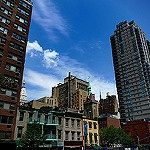

In [19]:
display_img(file, label)

In [20]:
### create data generator for test and train dataset

train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator()

train_img_gen.flow_from_directory(paths['train'], target_size=(150,150), batch_size=32, class_mode='categorical')


Found 14034 images belonging to 6 classes.


In [9]:
def create_generators():
    train_gen = tf.keras.preprocessing.image.ImageDataGenerator()
    train_gen.flow_from_directory(paths['train'], target_size=(150,150), batch_size=32, class_mode='categorical')

    test_gen = tf.keras.preprocessing.image.ImageDataGenerator()
    test_gen.flow_from_directory(paths['test'], target_size=(150,150), batch_size=32, class_mode='categorical')
    
    
    return train_gen, test_gen

In [10]:
 train_gen, test_gen = create_generators()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [26]:
def random_testing_sample(): # finds a random file in the training set, returns the file path and label
    label = random.choice(labels) # choice a random label
    files_path = os.path.join(paths["test"], label) # create the path to the label folder
    files = os.listdir(files_path) # list all files in the folder
    random_file = random.choice(files) # random choice of a file
    random_file_path = os.path.join(files_path, random_file) # create the full path to that file
    return random_file_path, label

In [49]:
def random_training_sample(): # finds a random file in the training set, returns the file path and label
    label = random.choice(labels) # choice a random label
    files_path = os.path.join(paths["train"], label) # create the path to the label folder
    files = os.listdir(files_path) # list all files in the folder
    random_file = random.choice(files) # random choice of a file
    random_file_path = os.path.join(files_path, random_file) # create the full path to that file
    return random_file_path, label


In [50]:
def display(image_path, label):
    print('Label : ', label)
    print('Size : ', )
    return IPython.display.Image(image_path)
    

Label :  buildings
Size : 


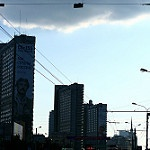

In [72]:
d, e = random_training_sample()
display(d, e)

In [74]:
building_img = a
building_lab = l
forest_img = d
forest_label = e

list_img = []
list_img.append([building_img, forest_img])
list_label = [l, c]

In [75]:
def display_one_of_each(list_img, list_label):
    print('Label : ', label)
    print('Size : ', )
    for img in list_img:
        
        return IPython.display.Image(image_path)

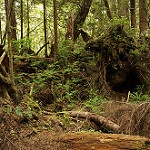

In [77]:
IPython.display.Image(img[0])

In [26]:
### Size of the input
Image.open(a).size, Image.open(a).mode

((150, 150), 'RGB')

In [4]:
img_height = 150 
img_width = 150

In [6]:
### Create data generator to use a few images at a time 
def create_datagenerators(batch_size, train_path=paths["train"], test_path=paths["test"]):
    train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                          rotation_range=10,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.1,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

    train_generator=train_datagen.flow_from_directory(
        paths["train"],
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')


    test_datagen = ImageDataGenerator(rescale = 1.0/255.)

    test_generator=test_datagen.flow_from_directory(
        paths["test"],
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')
    
    return train_generator, test_generator

batch_size = 32

train_generator, test_generator = create_datagenerators(batch_size)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [29]:
type(train_generator), type(test_generator)

(keras.preprocessing.image.DirectoryIterator,
 keras.preprocessing.image.DirectoryIterator)

In [30]:
### Creating a CNN model

In [12]:
model = keras.Sequential(
    [layers.Conv2D(filters=64, input_shape=(img_height, img_height,1), kernel_size=(3,3), padding='valid', activation='relu'),
     layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),
     
     layers.Conv2D(filters=128 , kernel_size=(3,3) , padding='valid',activation='relu'),
     layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),
     
     layers.Conv2D(filters=256 , kernel_size=(3,3) , padding='valid',activation='relu'),
     layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),
     
     layers.Flatten(),
     layers.Dense(units=128 , activation='relu'),
     layers.Dense(units=6, activation='softmax')
    
    ]
)

### compile the model = configure for training
#### add loss function, optmizers, choose metric

#### Here we use categorical cross entropy because of the multiclass problem
#### adam = rms prob + "momentum", rms prop
#### other metric possible : loss ?

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics='accuracy')

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 256)     

## Now training :)
### Let's try 10 epochs

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [17]:
history =  model.fit(x=train_generator, batch_size=32, epochs=15, validation_data=test_generator, verbose=1, callbacks=callback)

Epoch 1/15
439/439 [==============================] - 131s 271ms/step - loss: 1.1916 - accuracy: 0.5162 - val_loss: 0.8382 - val_accuracy: 0.6937
Epoch 2/15
439/439 [==============================] - 54s 123ms/step - loss: 0.8841 - accuracy: 0.6560 - val_loss: 0.6879 - val_accuracy: 0.7417
Epoch 3/15
439/439 [==============================] - 55s 125ms/step - loss: 0.7614 - accuracy: 0.7125 - val_loss: 0.6799 - val_accuracy: 0.7443
Epoch 4/15
439/439 [==============================] - 55s 125ms/step - loss: 0.7018 - accuracy: 0.7356 - val_loss: 0.6168 - val_accuracy: 0.7707
Epoch 5/15
439/439 [==============================] - 57s 129ms/step - loss: 0.6463 - accuracy: 0.7614 - val_loss: 0.5392 - val_accuracy: 0.8000
Epoch 6/15
439/439 [==============================] - 57s 130ms/step - loss: 0.6219 - accuracy: 0.7666 - val_loss: 0.5155 - val_accuracy: 0.8110
Epoch 7/15
439/439 [==============================] - 56s 129ms/step - loss: 0.5884 - accuracy: 0.7783 - val_loss: 0.5636 - val_a

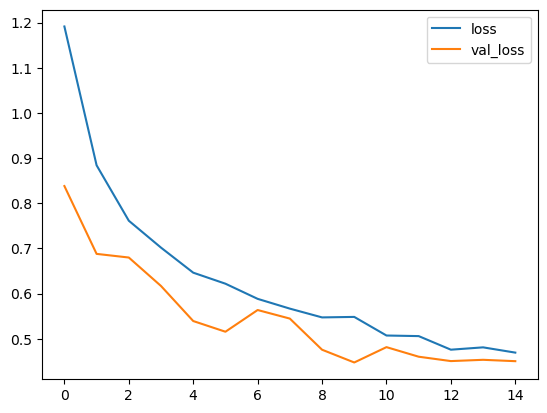

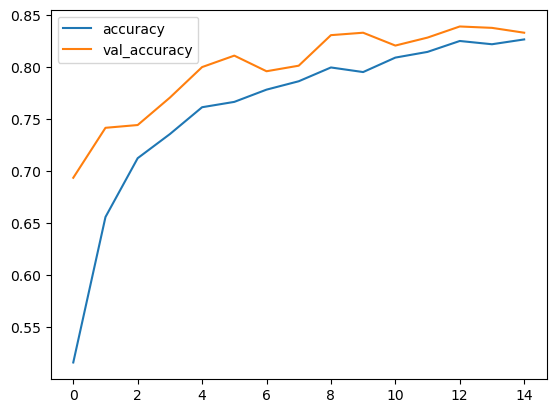

In [18]:
def print_save(model, history, name, save=True, plot=True):
    model.save(name)

    hist_df = pd.DataFrame(history.history)
    
    if save:
        hist_csv_file = name+'_history.csv'
        with open(hist_csv_file, mode='w') as f:
            hist_df.to_csv(f)
    if plot:
        hist_df[["loss",'val_loss']].plot()
        hist_df[["accuracy",'val_accuracy']].plot()
        
print_save(model, history, 'simple_model',save=False)

In [22]:
history.history

{'loss': [1.079537272453308,
  0.781696617603302,
  0.6630879640579224,
  0.607735276222229,
  0.5652716755867004,
  0.5291308164596558,
  0.4997630715370178,
  0.47545126080513,
  0.4573759436607361,
  0.4411071240901947],
 'accuracy': [0.5780960321426392,
  0.706284761428833,
  0.7537409067153931,
  0.7762576341629028,
  0.793572723865509,
  0.8076100945472717,
  0.81879723072052,
  0.8309819102287292,
  0.8337608575820923,
  0.8377511501312256],
 'val_loss': [0.8918539881706238,
  0.6788996458053589,
  0.5802669525146484,
  0.5648532509803772,
  0.48709920048713684,
  0.46068358421325684,
  0.47994986176490784,
  0.4081645905971527,
  0.4047525227069855,
  0.42855581641197205],
 'val_accuracy': [0.6803333163261414,
  0.7476666569709778,
  0.7866666913032532,
  0.7860000133514404,
  0.8289999961853027,
  0.8303333520889282,
  0.8226666450500488,
  0.8553333282470703,
  0.8569999933242798,
  0.8420000076293945]}

## 3. Lets try ResNe50

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [22]:
model_res = ResNet50(weights='imagenet')

Label :  sea
Size : 


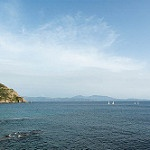

In [46]:
test_img, test_label = random_testing_sample()

display(test_img, test_label)


In [47]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


img = image.load_img(test_img, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


preds = model_res.predict(x)


print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 24ms/step
Predicted: [('n09399592', 'promontory', 0.5381495), ('n09246464', 'cliff', 0.20704895), ('n09428293', 'seashore', 0.18340914)]


1/1 [==============================] - 1s 1s/step


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n06874185', 'traffic_light', 0.5374567), ('n03837869', 'obelisk', 0.08537408), ('n06794110', 'street_sign', 0.059422895)]
